In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

## Calculate HMQ

In [2]:
cols = ["dna_chr", "dna_start", "dna_end", "rna_chr", "rna_start",
           "rna_end", "rna_strand", "rna_name", "rna_type", "bardic_pval",
           "bardic_qval", "macs_pval", "macs_qval", "piranha_pval",
           "piranha_qval", "dna_intersect", "rna_intersect", "scaling_weight"]

frip = pd.read_table("SUZ12_fRIP.bed", header=None, names=cols)
frip["HMQ"] = 3 / ((1/frip.bardic_qval) + (1/frip.piranha_qval) + (1/frip.macs_qval))
frip["experiment"] = "fRIP-Seq"

eclip = pd.read_table("SUZ12_eCLIP.bed", header=None, names=cols)
eclip["HMQ"] = 3 / ((1/eclip.bardic_qval) + (1/eclip.piranha_qval) + (1/eclip.macs_qval))
eclip["experiment"] = "eCLIP"

In [3]:
draw_hmqs = pd.concat([frip.iloc[:, -2:], eclip.iloc[:, -2:]])
draw_hmqs.loc[draw_hmqs["HMQ"] == 0, "HMQ"] = 20
draw_hmqs["-log10HMQ"] = draw_hmqs.HMQ.apply(lambda x: - np.log10(x))

<Figure size 1500x1000 with 0 Axes>

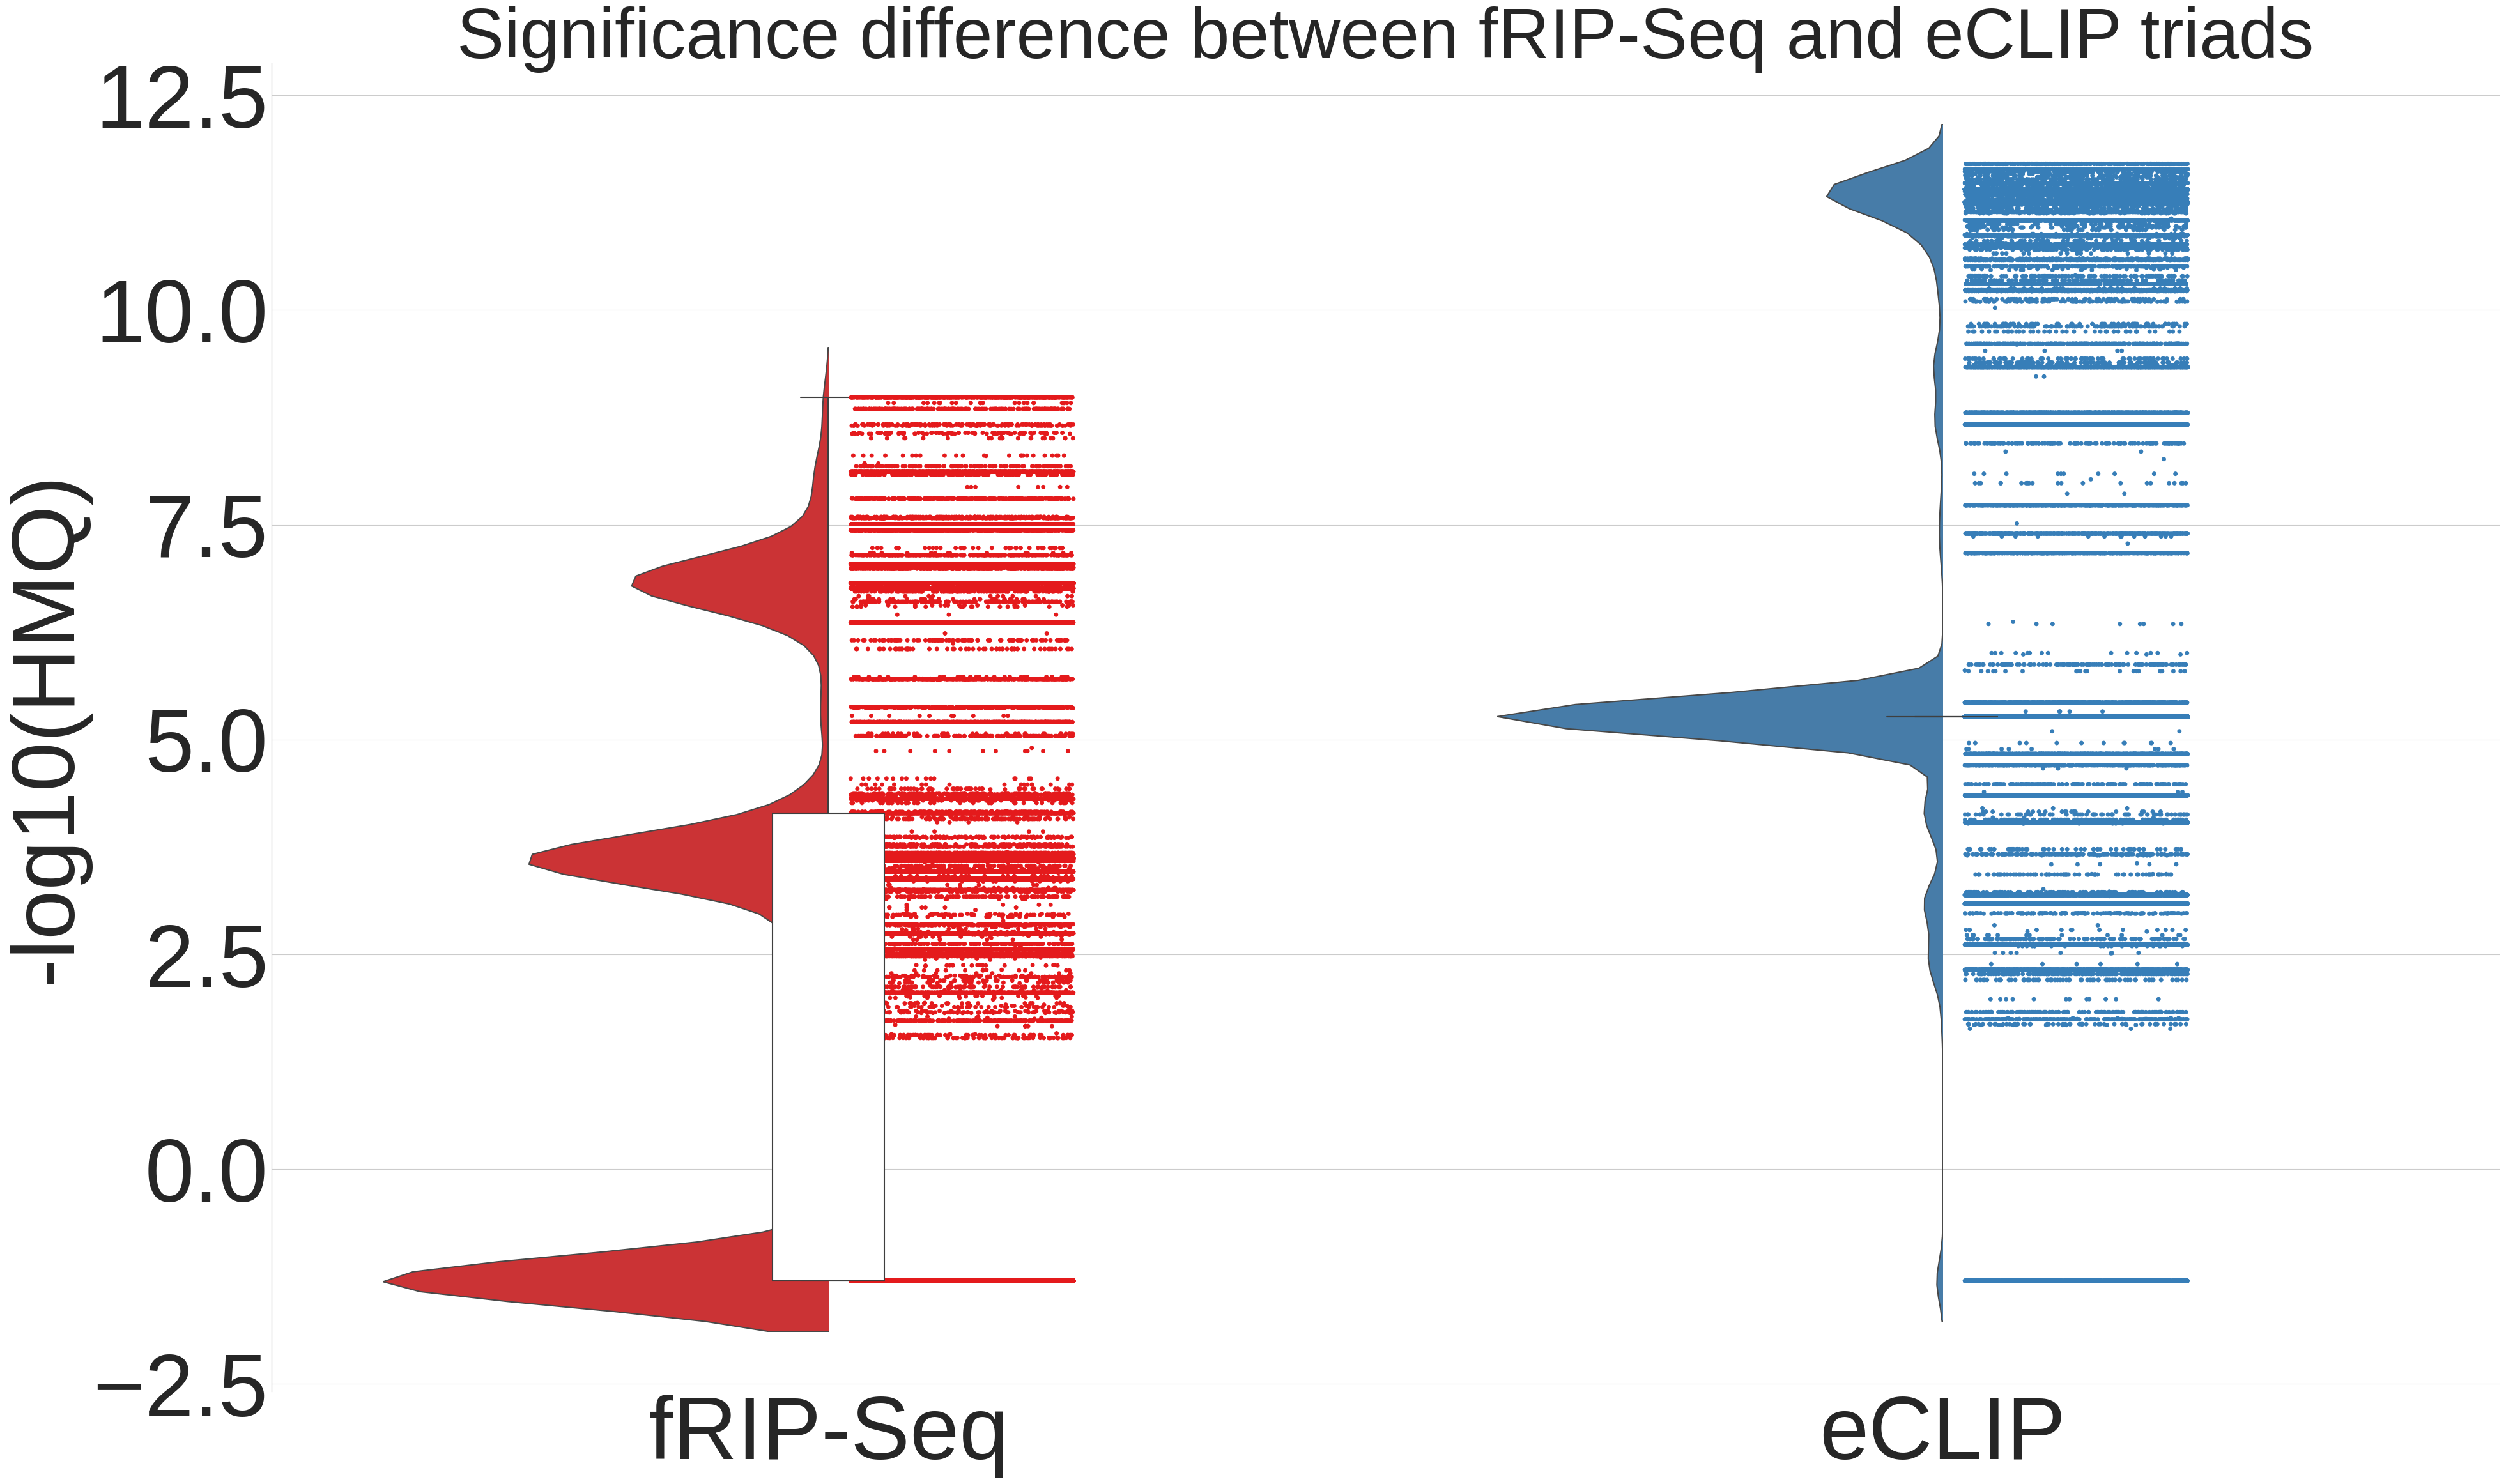

In [4]:
plt.figure(figsize=(15,10))
sns.set_style('white')
palette = 'Set1'
plt.figure(figsize=(45,27))
plt.style.use("seaborn-v0_8-whitegrid")
ax = sns.violinplot(x="experiment", y="-log10HMQ", data=draw_hmqs, hue="experiment", dodge=False,
                    palette=palette,
                    scale="width", inner=None)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

ax.set_alpha(0.6)
sns.boxplot(x="experiment", y="-log10HMQ", data=draw_hmqs, saturation=1, showfliers=False,
            width=0.1, boxprops={'zorder': 4, 'facecolor': 'white'}, ax=ax)
old_len_collections = len(ax.collections)
sns.stripplot(x="experiment", y="-log10HMQ", data=draw_hmqs, hue="experiment", palette=palette, 
              dodge=False, ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=100)
ax.legend_.remove()
plt.xlabel("")
plt.ylabel('-log10(HMQ)', fontsize=100)
plt.title("Significance difference between fRIP-Seq and eCLIP triads", fontsize=80)
plt.show()

## Draw scaling

In [5]:
draw_hmqs = pd.concat([frip.iloc[:, [-3,-1]], eclip.iloc[:, [-3,-1]]])
draw_hmqs["scaling_weight"] = np.log10(draw_hmqs["scaling_weight"])

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log10 method

In [6]:
plt.figure(figsize=(15,10))
sns.set_style('white')
palette = 'Set1'
plt.figure(figsize=(45,27))
plt.style.use("seaborn-v0_8-whitegrid")
ax = sns.violinplot(x="experiment", y="scaling_weight", data=draw_hmqs, hue="experiment", dodge=False,
                    palette=palette,
                    scale="width", inner=None)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

ax.set_alpha(0.6)
sns.boxplot(x="experiment", y="scaling_weight", data=draw_hmqs, saturation=1, showfliers=False,
            width=0.1, boxprops={'zorder': 4, 'facecolor': 'white'}, ax=ax)
old_len_collections = len(ax.collections)
sns.stripplot(x="experiment", y="scaling_weight", data=draw_hmqs, hue="experiment", palette=palette, 
              dodge=False, ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=100)
ax.legend_.remove()
plt.xlabel("")
plt.ylabel('log10(Scaling weight)', fontsize=100)
plt.title("Scaling difference between fRIP-Seq and eCLIP triads", fontsize=80)
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1500x1000 with 0 Axes>

<Figure size 4500x2700 with 0 Axes>

## Common RNA

In [7]:
frip = []
eclip = []
with open("RNA_list/fRIP_RNA.txt", 'r') as frip_inp:
    for line in frip_inp:
        frip.append(line.strip())
with open("RNA_list/eCLIP_RNA.txt", 'r') as eclip_inp:
    for line in eclip_inp:
        eclip.append(line.strip())

209


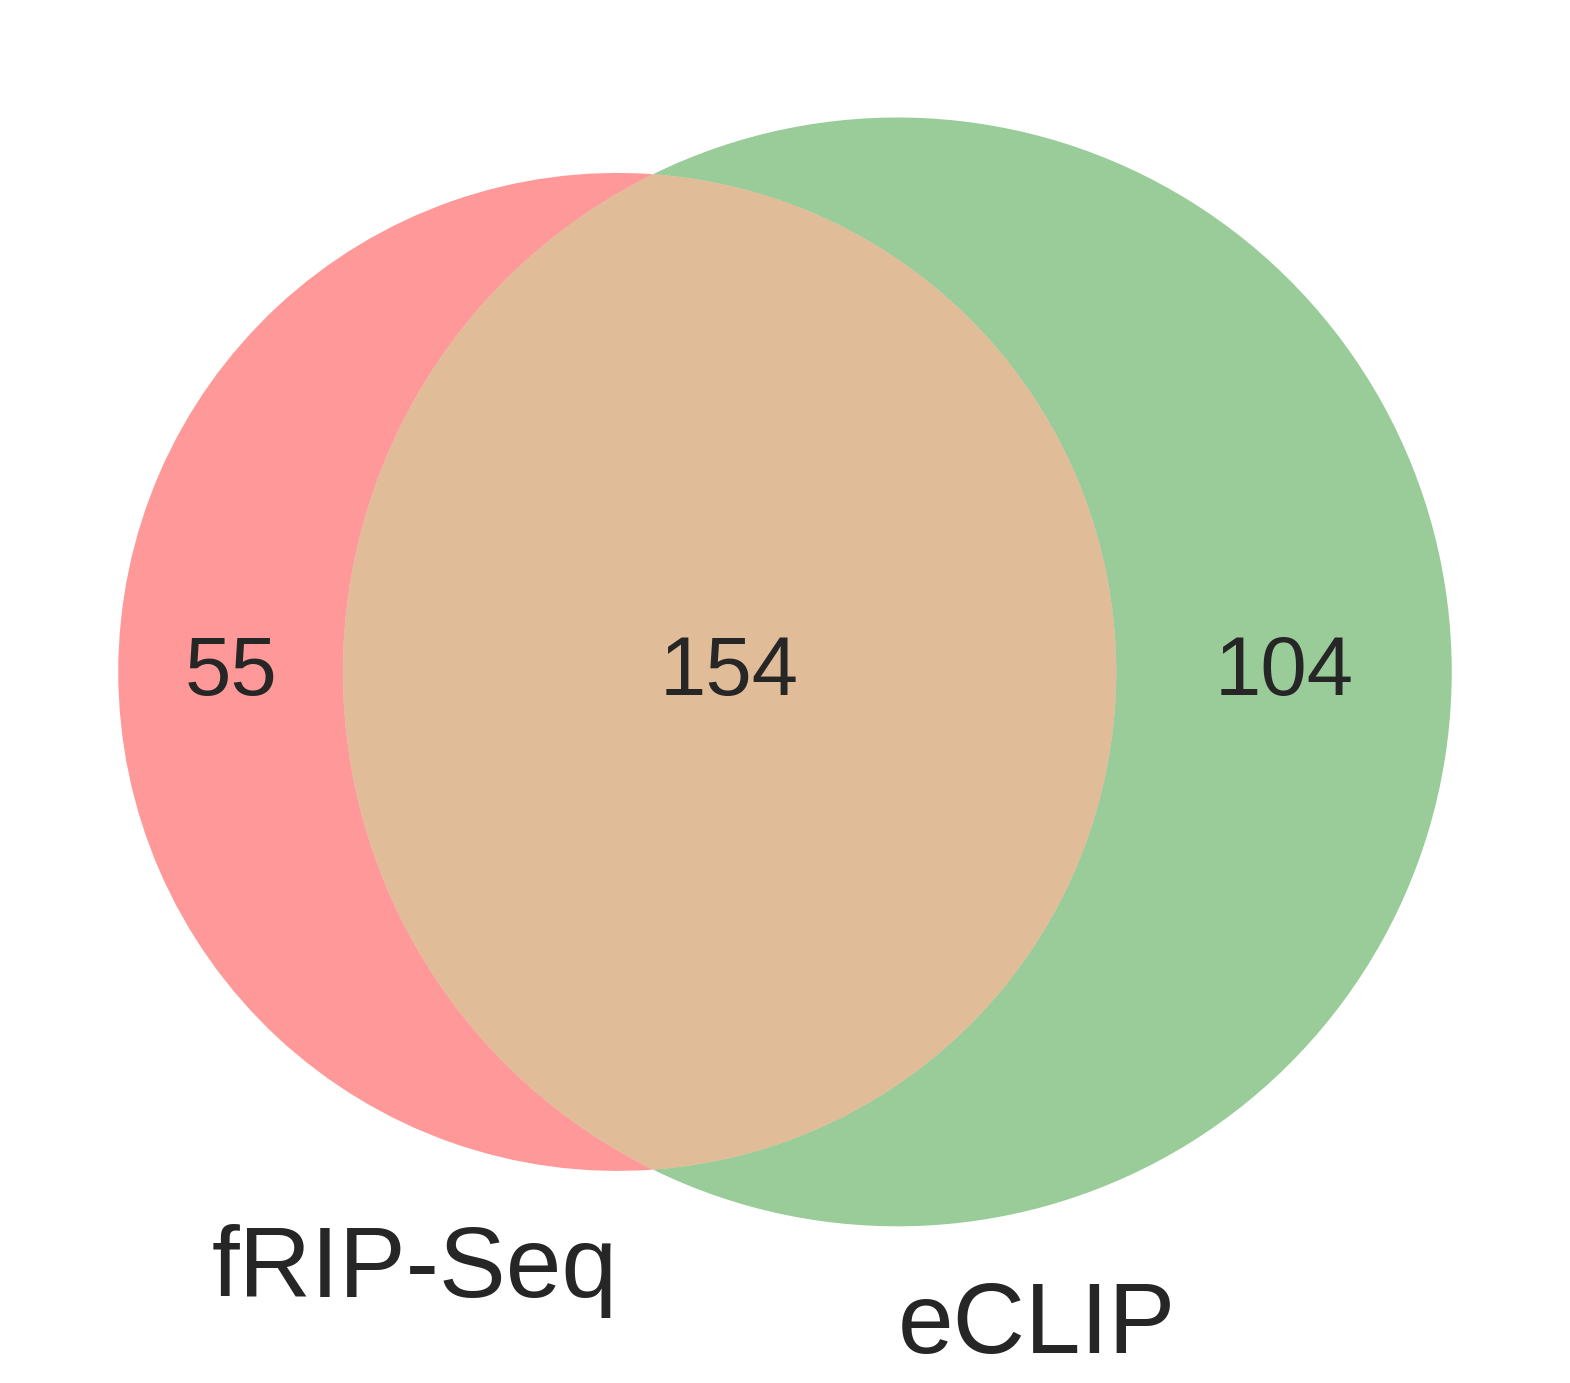

In [9]:
from matplotlib_venn._venn2 import venn2
import matplotlib
plt.figure(figsize=(20,20))
f = {'size'   : 60, 'weight':'normal'}
matplotlib.rc('font', **f)
print(len(set(frip)))
venn2(subsets = (len(set(frip).difference(set(eclip))), len(set(eclip).difference(set(frip))),
                 len(set(frip).intersection(set(eclip)))),
      set_labels = ("fRIP-Seq", "eCLIP"))
plt.savefig("rna.svg")

## Z-scores

In [93]:
cols = ["dna_chr", "dna_start", "dna_end", "rna_chr", "rna_start",
           "rna_end", "rna_strand", "rna_name", "rna_type", "bardic_pval",
           "bardic_qval", "macs_pval", "macs_qval", "piranha_pval",
           "piranha_qval", "dna_intersect", "rna_intersect", "scaling_weight", "experiment"]

frip = pd.read_table("SUZ12_fRIP.bed", header=None, names=cols)
frip["HMQ"] = 3 / ((1/frip.bardic_qval) + (1/frip.piranha_qval) + (1/frip.macs_qval))
frip["rip"] = "fRIP-Seq"

eclip = pd.read_table("SUZ12_eCLIP.bed", header=None, names=cols)
eclip["HMQ"] = 3 / ((1/eclip.bardic_qval) + (1/eclip.piranha_qval) + (1/eclip.macs_qval))
eclip["rip"] = "eCLIP"
contacts = pd.concat([frip, eclip])

In [79]:
radicl_chp = pd.read_table("ES_radicl_rnaseqMENCODE.chP.tab")
radicl_chp["experiment"] = "radicl_2FA_mESC"
radicl_chp = radicl_chp.iloc[:, [0,9,13]]
grid_chp = pd.read_table("ES_grid_rnaseqMENCODE.chP.tab")
grid_chp["experiment"] = "grid_mESC"
grid_chp = grid_chp.iloc[:, [0,9,13]]
chp_df = pd.concat([radicl_chp, grid_chp])
chp_df

,gene_name_un,zscore,experiment
0,1110002O04Rik,0.461193,radicl_2FA_mESC
1,1600012P17Rik,1.453865,radicl_2FA_mESC
2,1700001G17Rik,-1.157874,radicl_2FA_mESC
3,1700003I22Rik,1.900422,radicl_2FA_mESC
4,1700007P06Rik,1.094387,radicl_2FA_mESC
...,...,...,...
54887,Xrna_chrY_90772823_ES,2.995746,grid_mESC
54888,Xrna_chrY_90772920_ES,4.553274,grid_mESC
54889,Xrna_chrY_90825258_ES,-0.325844,grid_mESC
54890,Zfy1,-2.518583,grid_mESC


In [96]:
zscore_data = contacts.merge(chp_df, left_on=["rna_name", "experiment"], 
                         right_on=["gene_name_un", "experiment"], how='inner')
zscore_data = zscore_data.iloc[:, [-3, -2, -1]]
zscore = zscore_data.drop_duplicates()


<Figure size 1500x1000 with 0 Axes>

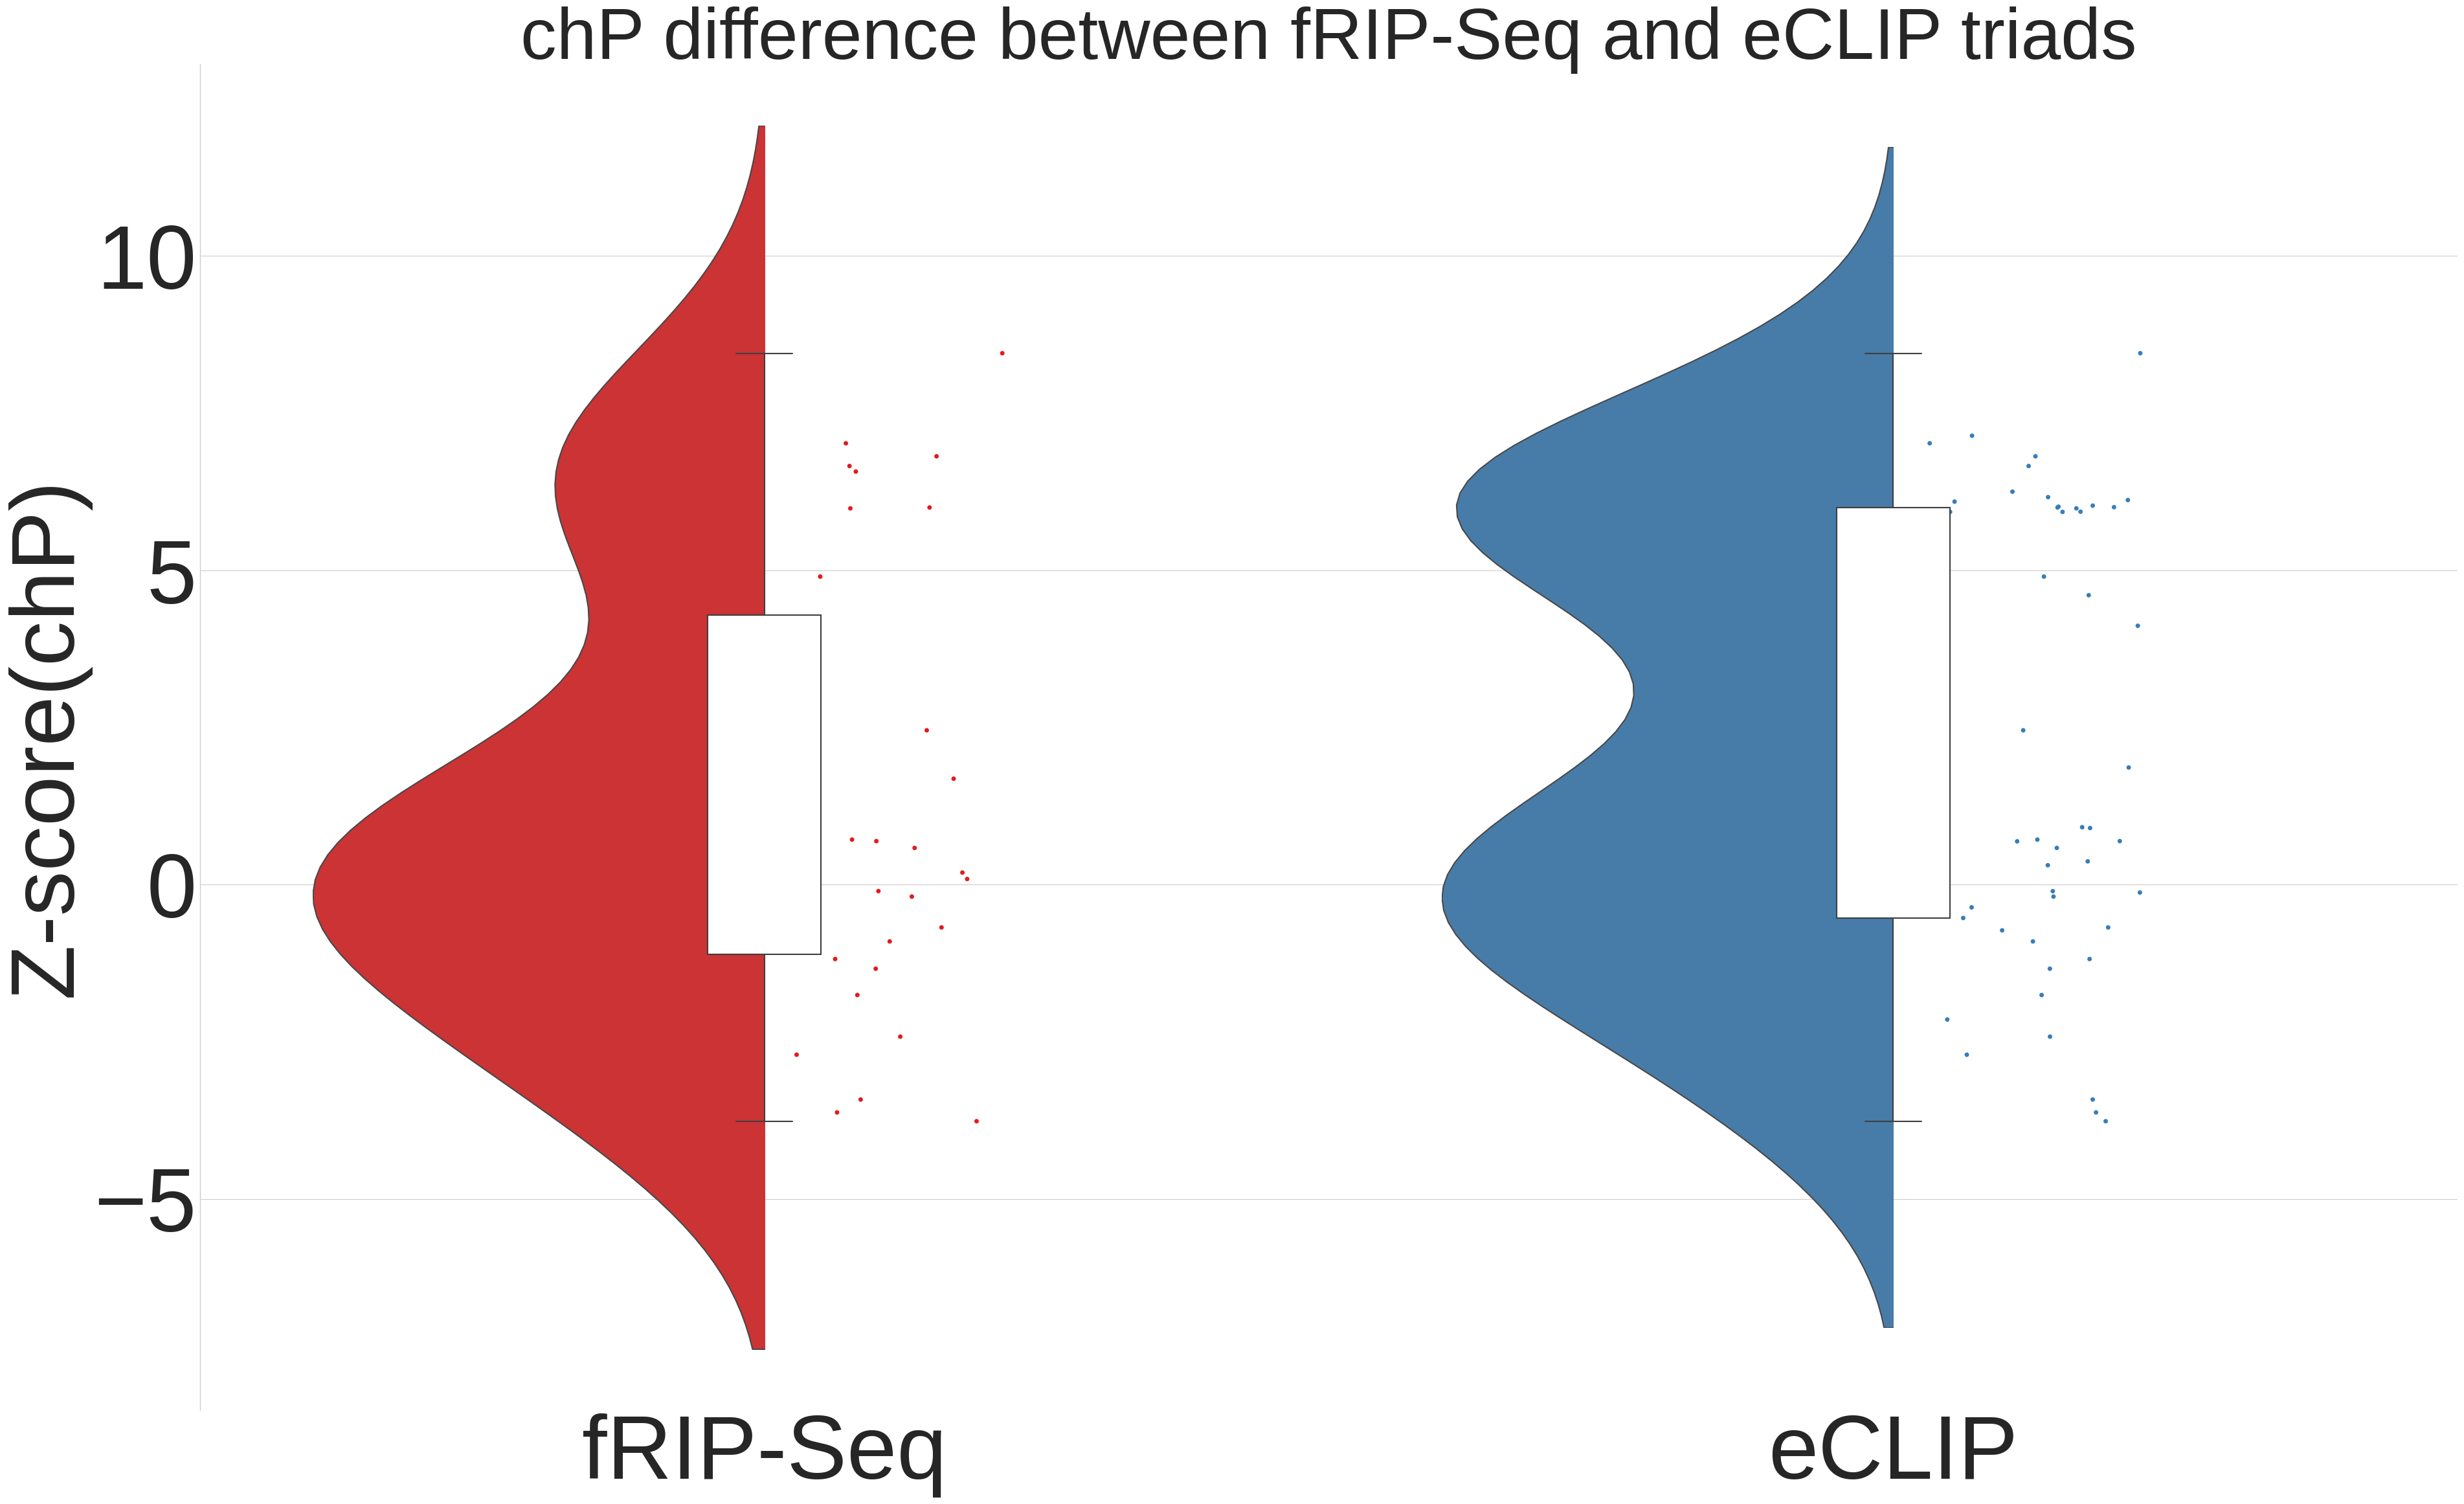

In [100]:
plt.figure(figsize=(15,10))
sns.set_style('white')
palette = 'Set1'
plt.figure(figsize=(45,27))
plt.style.use("seaborn-v0_8-whitegrid")
ax = sns.violinplot(x="rip", y="zscore", data=zscore, hue="rip", dodge=False,
                    palette=palette,
                    scale="width", inner=None)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

ax.set_alpha(0.6)
sns.boxplot(x="rip", y="zscore", data=zscore, saturation=1, showfliers=False,
            width=0.1, boxprops={'zorder': 4, 'facecolor': 'white'}, ax=ax)
old_len_collections = len(ax.collections)
sns.stripplot(x="rip", y="zscore", data=zscore, hue="rip", palette=palette, 
              dodge=False, ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=100)
ax.legend_.remove()
plt.xlabel("")
plt.ylabel('Z-score(chP)', fontsize=100)
plt.title("chP difference between fRIP-Seq and eCLIP triads", fontsize=80)
plt.show()

## intersection sizes

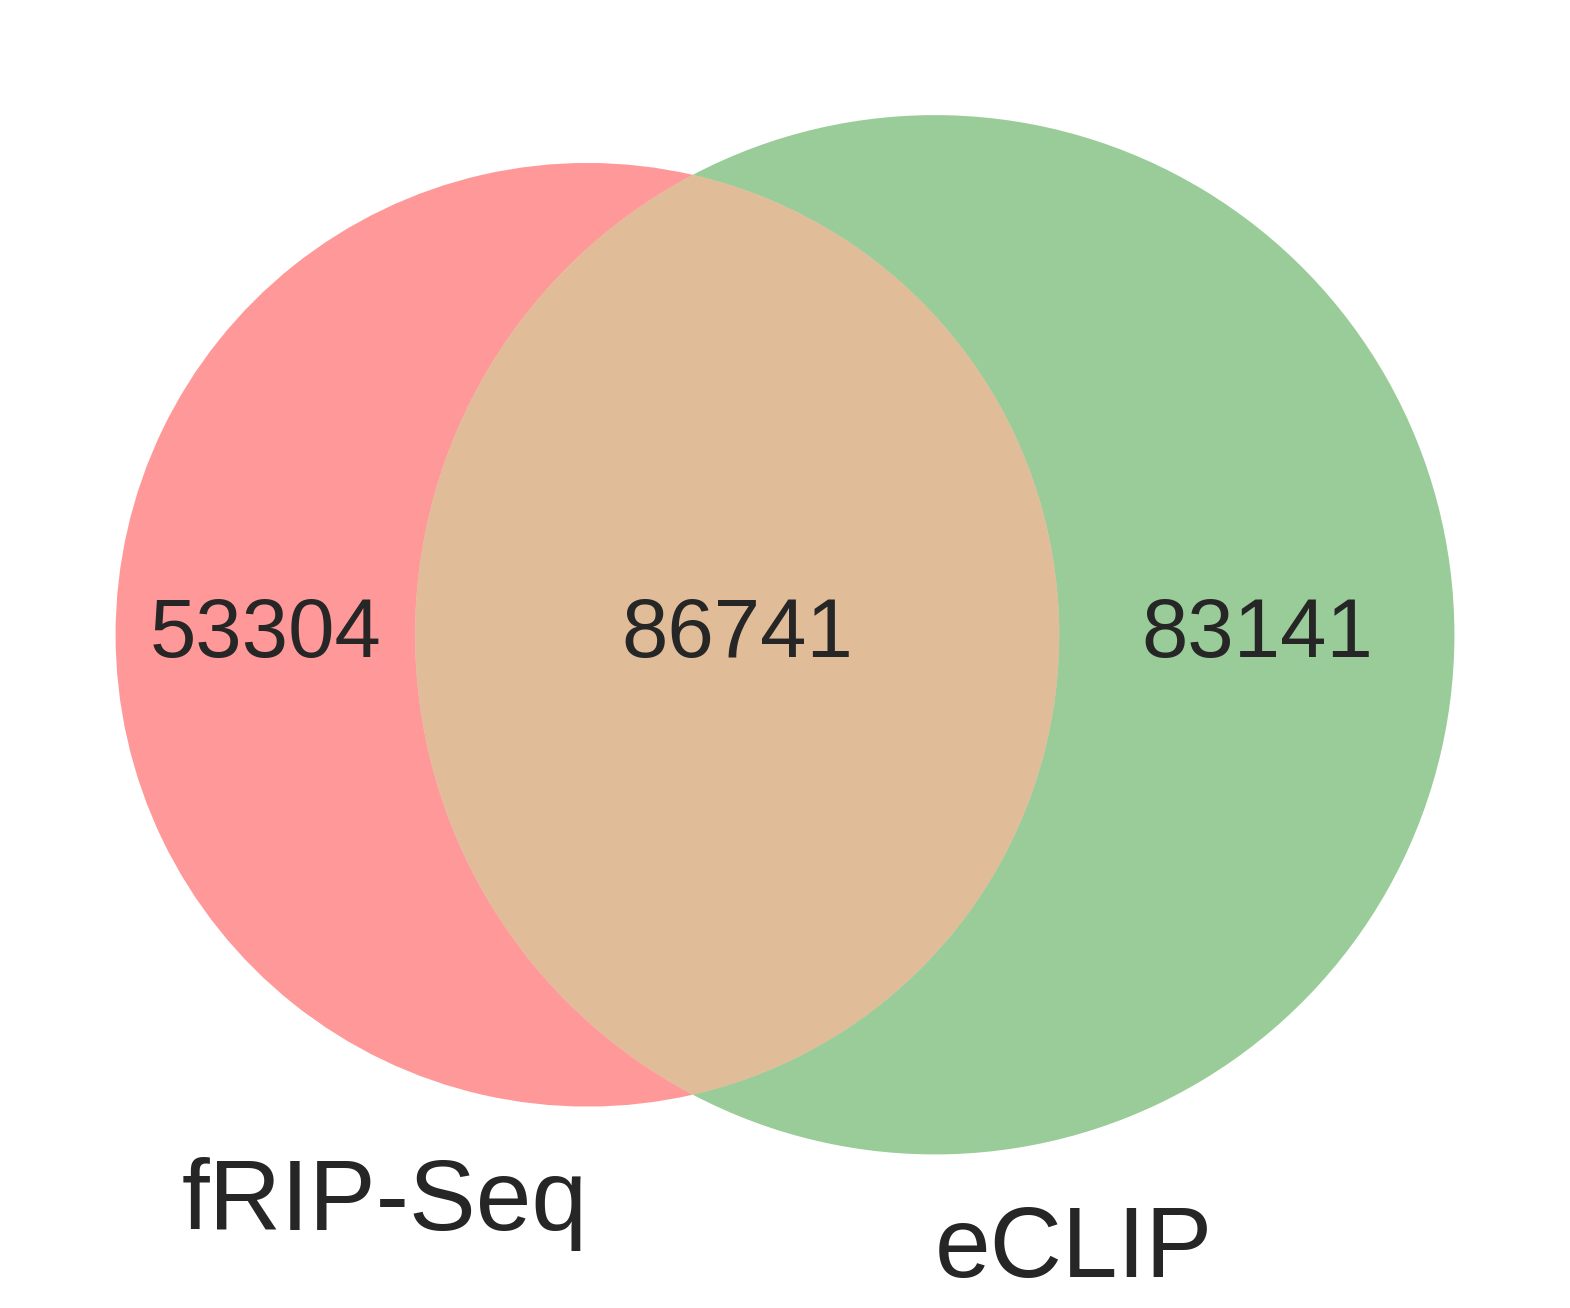

In [12]:
from matplotlib_venn._venn2 import venn2
import matplotlib
plt.figure(figsize=(20,20))
f = {'size'   : 60, 'weight':'normal'}
matplotlib.rc('font', **f)
venn2(subsets = (53304, 83141, 86741),
      set_labels = ("fRIP-Seq", "eCLIP"))
plt.savefig("contacts.svg")

## Типы РНК в фазах

In [4]:
cols = ["dna_chr", "dna_start", "dna_end", "rna_chr", "rna_start", "rna_end", "name", "type", "weight"]
dt_cols = {k: v for k,v in enumerate(cols)}

symdif = pd.read_csv("phases/SUZ12_symdiff.bed", sep='\t', header=None).rename(columns=dt_cols)
inters = pd.read_csv("phases/SUZ12_intersection.bed", sep='\t', header=None).rename(columns=dt_cols)
frip   = pd.read_csv("phases/SUZ12_fRIP_only.bed", sep='\t', header=None).rename(columns=dt_cols)
eCLIP  = pd.read_csv("phases/SUZ12_eCLIP_only.bed", sep='\t', header=None).rename(columns=dt_cols)

In [43]:
df = eCLIP


x = df.type.value_counts().sort_values(ascending=False).loc[["snRNA", "Xrna", "snoRNA",
                                                            "lincRNA", "miRNA"]]


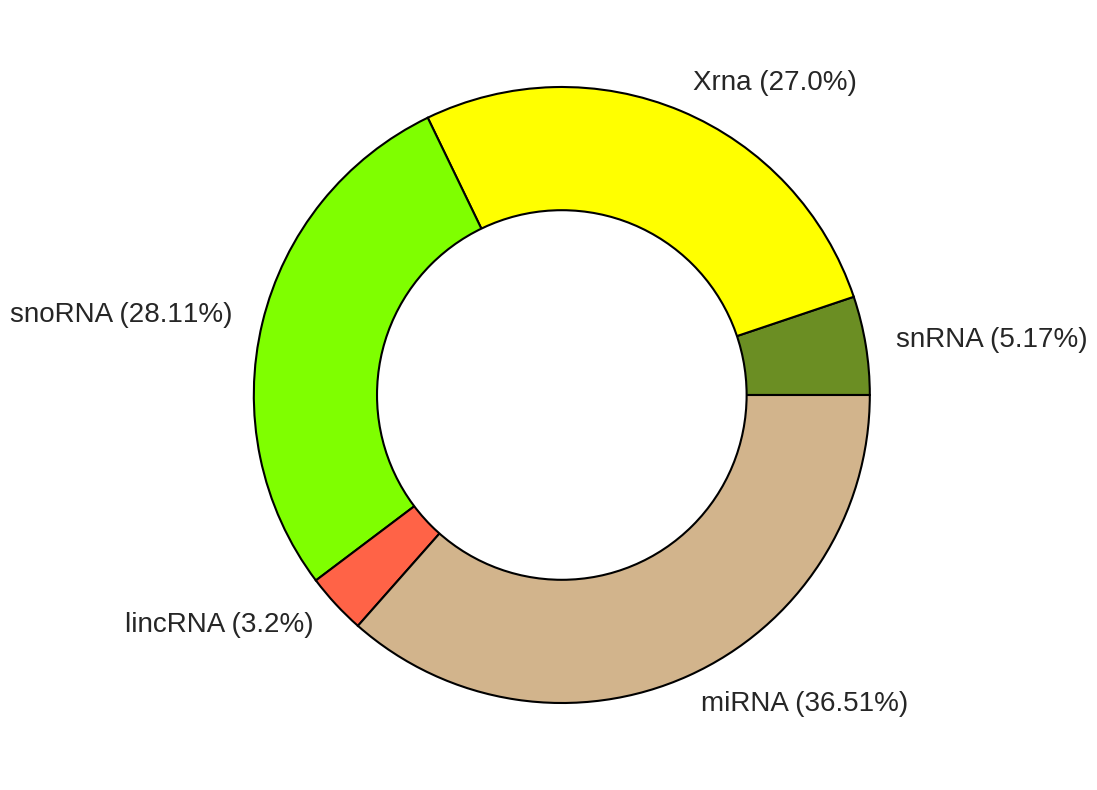

In [44]:
import matplotlib
matplotlib.rcParams['font.size'] = 20
plt.figure(figsize=(10,10))
plt.style.use("seaborn-v0_8-whitegrid")

tmp = x / sum(x)
lbs = [f"{y} ({x}%)" for x, y in zip(np.round(tmp.values * 100, 2).astype("str"), tmp.index)]


plt.pie(x, labels=lbs,
#        autopct='%1.1f%%', pctdistance=0.85,
        colors=['olivedrab', 'yellow', 'chartreuse', 'tomato', "tan"],
        wedgeprops={"edgecolor":"k",'linewidth': 1.5, 'antialiased': True})


# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white', edgecolor="k", linewidth=1.5, antialiased=True)
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Displaying Chart
#plt.show()
plt.savefig("/home/daniil/Desktop/biotypes_eCLIP.pdf")